### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [5]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="llama-3.3-70b-versatile")
llm_groq.invoke("Hey I am David and I love to play cricket")

AIMessage(content="Nice to meet you, David. Cricket is an amazing sport, isn't it? What position do you play? Are you a batsman, bowler, or an all-rounder? Do you have a favorite team or player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 45, 'total_tokens': 94, 'completion_time': 0.09721078, 'prompt_time': 0.00267378, 'queue_time': 0.093115117, 'total_time': 0.09988456}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--fd712a25-9301-4aad-8c00-6b69966ab178-0', usage_metadata={'input_tokens': 45, 'output_tokens': 49, 'total_tokens': 94})

### We Will start With Creating Nodes

In [7]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

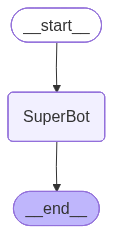

In [8]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
## Invocation

graph_builder.invoke({'messages':"Hi, My name is David And I love to play cricket"})

{'messages': [HumanMessage(content='Hi, My name is David And I love to play cricket', additional_kwargs={}, response_metadata={}, id='80e85890-b16a-4e45-86f7-e11d01289cf0'),
  AIMessage(content="Nice to meet you, David. Cricket is a fantastic sport, and it's great that you're passionate about it. Are you a fan of a particular team or player? Do you play cricket yourself, or do you enjoy watching international matches?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 47, 'total_tokens': 97, 'completion_time': 0.134350582, 'prompt_time': 0.002419274, 'queue_time': 0.092498182, 'total_time': 0.136769856}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c0ce2216-d692-4222-9c44-61f7784915c6-0', usage_metadata={'input_tokens': 47, 'output_tokens': 50, 'total_tokens': 97})]}

#### Streaming The responses

In [10]:
graph_builder.stream({"messages":"Hi, My name is David !"})

<generator object Pregel.stream at 0x7fb8dc607700>

In [11]:
for event in graph_builder.stream({"messages":"Hello My name is David"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello My name is David', additional_kwargs={}, response_metadata={}, id='a603ac5a-db88-477c-90ad-ebea49bf5006')]}
{'messages': [HumanMessage(content='Hello My name is David', additional_kwargs={}, response_metadata={}, id='a603ac5a-db88-477c-90ad-ebea49bf5006'), AIMessage(content="Hello David, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 40, 'total_tokens': 66, 'completion_time': 0.041397591, 'prompt_time': 0.001791637, 'queue_time': 0.101935854, 'total_time': 0.043189228}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--0868f334-f76d-4edb-b37c-c5b3c14e361c-0', usage_metadata={'input_tokens': 40, 'output_tokens': 26, 'total_tokens': 66})]}
